# Weather Station Clustering 

##K-means using python & scikit-learn¶

Created by: Saeed Aghabozorgi, Polong Lin

Environment Canada		  
Monthly Values for July - 2015	  	
		
Legend  		
Stn_Name::::	Station Name  
Lat	    ::::	Latitude (North + , degrees)  
Long	::::	Longitude (West - , degrees)  
Prov	::::	Province  
Tm	    ::::	Mean Temperature (Â°C)  
DwTm	::::	Days without Valid Mean Temperature  
D	    ::::	Mean Temperature difference from Normal (1981-2010) (Â°C)  
Tx	    ::::	Highest Monthly Maximum Temperature (Â°C)  
DwTx	::::	Days without Valid Maximum Temperature  
Tn	    ::::	Lowest Monthly Minimum Temperature (Â°C)  
DwTn	::::	Days without Valid Minimum Temperature  
S	    ::::	Snowfall (cm)  
DwS	    ::::	Days without Valid Snowfall  
S%N	    ::::	Percent of Normal (1981-2010) Snowfall  
P	    ::::	Total Precipitation (mm)  
DwP	    ::::	Days without Valid Precipitation  
P%N	    ::::	Percent of Normal (1981-2010) Precipitation  
S_G  	::::	Snow on the ground at the end of the month (cm)  
Pd	    ::::	Number of days with Precipitation 1.0 mm or more  
BS	    ::::	Bright Sunshine (hours)  
DwBS	::::	Days without Valid Bright Sunshine  
BS%  	::::	Percent of Normal (1981-2010) Bright Sunshine  
HDD 	::::	Degree Days below 18 Â°C  
CDD	    ::::	Degree Days above 18 Â°C  
Stn_No	::::	Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).  
NA	    ::::	Not Available  

### 1-Download Data

In [1]:
!/usr/local/bin/wget -O /resources/weather-stations20140101-20141231.csv https://ibm.box.com/shared/static/mv6g5p1wpmpvzoz6e5zgo47t44q8dvm0.csv

--2015-10-08 13:51:21--  https://ibm.box.com/shared/static/mv6g5p1wpmpvzoz6e5zgo47t44q8dvm0.csv
Resolving ibm.box.com... 74.112.185.182, 74.112.184.85
Connecting to ibm.box.com|74.112.185.182|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ibm.app.box.com/shared/static/mv6g5p1wpmpvzoz6e5zgo47t44q8dvm0.csv [following]
--2015-10-08 13:51:22--  https://ibm.app.box.com/shared/static/mv6g5p1wpmpvzoz6e5zgo47t44q8dvm0.csv
Resolving ibm.app.box.com... 74.112.184.87, 74.112.185.87
Connecting to ibm.app.box.com|74.112.184.87|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.boxcloud.com/d/1/bsp0xVXUrgvE8jPeSN789D8NUyr-NpGglXqQyOUU8pjVQ-RLb7mWVrQ67myfywahwlNCE3MNDvapsqZF3p86SJgXnkRk-Ih_m3iDEkr_526r1sQ8D7r0xje6JMPbgfuTyYlxdji2SYVgPQnoUhVK8Fx3oz1zrEABFUoKXBFHfkqF2WqvAFSqBTRWRtshuumPkLDLQt7rvL5TT1RD7XbtK2X8eZxN126l7mWeH4NIAlelOi0crv3EHHoh6am-usHeD7knbyOyeL51cBT775_7IdIuVsgATwzFZBFcVSiTGnRH0KEpCeT43jZp6DLDLKcVSj4glJ9Ox6DWD

### 2- Load data

In [2]:
import csv
import pandas as pd
import numpy as np

filename='/resources/weather-stations20140101-20141231.csv'

#Read csv
pdf = pd.read_csv(filename)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0,NaN,13.5,0,1.0,...,0,NaN,0,12,NaN,NaN,NaN,273.3,0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0,3.0,15.0,0,-3.0,...,0,104,0,12,NaN,NaN,NaN,307.0,0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13,2.8,16.0,9,-2.5,...,9,NaN,NaN,11,NaN,NaN,NaN,168.1,0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2,3.4,14.5,2,-1.0,...,2,NaN,NaN,11,NaN,NaN,NaN,267.7,0,1012573


### 3- Clean data

In [3]:
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0,NaN,13.5,0,1.0,...,0,NaN,0,12,NaN,NaN,NaN,273.3,0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0,3.0,15.0,0,-3.0,...,0,104,0,12,NaN,NaN,NaN,307.0,0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13,2.8,16.0,9,-2.5,...,9,NaN,NaN,11,NaN,NaN,NaN,168.1,0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2,3.4,14.5,2,-1.0,...,2,NaN,NaN,11,NaN,NaN,NaN,267.7,0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0,NaN,13.1,0,1.9,...,8,NaN,NaN,12,NaN,NaN,NaN,258.6,0,1012710


### 4- Visualization of data

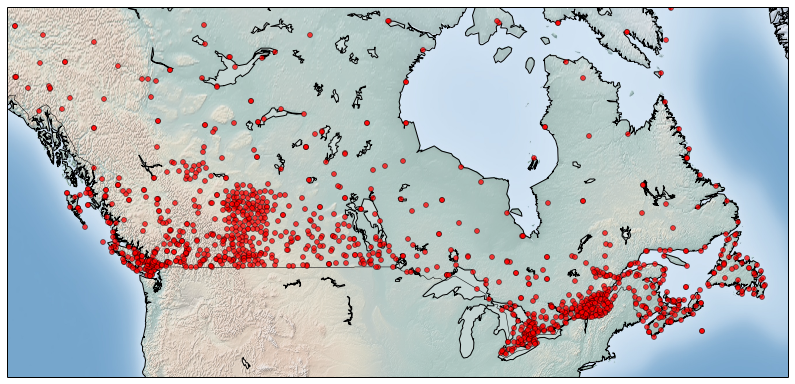

In [4]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon = -140
ulon = -50
llat = 40
ulat = 65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm'] = xs.tolist()
pdf['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()



### 5-Clustering based on temperature

In [5]:
from sklearn.cluster import KMeans
import sklearn.utils
from sklearn.preprocessing import StandardScaler
clusterNum = 7
sklearn.utils.check_random_state(1000)

Clus_dataSet = zip(np.asarray(pdf.xm),np.asarray(pdf.ym))
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet=StandardScaler().fit_transform(Clus_dataSet)
est = KMeans(n_clusters=clusterNum)
est.fit(Clus_dataSet)
labels = est.labels_
pdf["Clus_km"] = labels

# A sample of clusters
pdf[["Stn_Name","xm","ym","Tx","Tm","Clus_km"]].head(5)

,Stn_Name,xm,ym,Tx,Tm,Clus_km
0,CHEMAINUS,1807806.266120,1396332.287866,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,1764329.070275,1377564.348686,15.0,7.0,0
2,LAKE COWICHAN,1773335.855092,1378408.856386,16.0,6.8,0
3,DUNCAN KELVIN CREEK,1809362.994360,1362546.186690,14.5,7.7,0
4,ESQUIMALT HARBOUR,1841498.313029,1311615.319829,13.1,8.8,0


### 6- Visualize the clusters

Cluster 0, Avg Temp: 1.47638888889
Cluster 1, Avg Temp: -15.2628787879
Cluster 2, Avg Temp: -19.3818181818
Cluster 3, Avg Temp: -15.0651090343
Cluster 4, Avg Temp: -9.67443946188
Cluster 5, Avg Temp: -19.1748201439
Cluster 6, Avg Temp: -29.264516129


/Library/Python/2.7/site-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


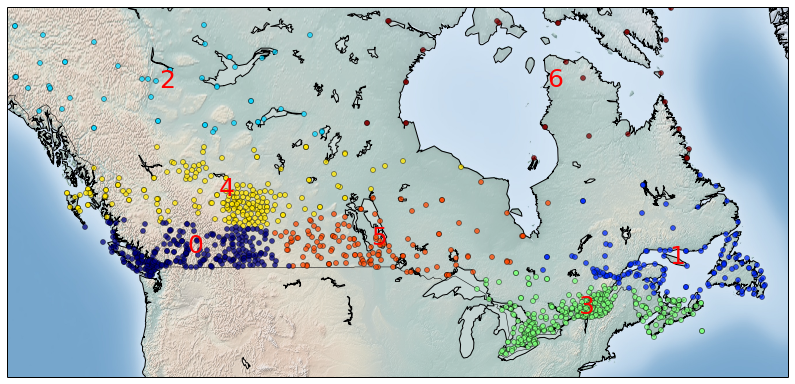

In [6]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

#Visualization1
for index,row in pdf.iterrows():
    my_map.plot(row.xm, row.ym,markerfacecolor =colors[np.float(row.Clus_km)],  marker='o', markersize= 5, alpha = 0.75)

for i in range(clusterNum): 
    cluster = pdf[["Stn_Name","Tm","xm","ym","Clus_km"]][pdf.Clus_km==i]
    cenx = np.mean(cluster.xm) 
    ceny = np.mean(cluster.ym) 
    plt.text(cenx,ceny,str(i), fontsize=25, color='red',)
    print "Cluster "+str(i)+', Avg Temp: '+ str(np.mean(cluster.Tm))

In [7]:
from sklearn.cluster import KMeans
import sklearn.utils
from sklearn.preprocessing import StandardScaler
clusterNum = 7
sklearn.utils.check_random_state(1000)

Clus_dataSet = zip(np.asarray(pdf.xm),np.asarray(pdf.ym),np.asarray(pdf.Tx),np.asarray(pdf.Tn),np.asarray(pdf.Tm))
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet=StandardScaler().fit_transform(Clus_dataSet)
est = KMeans(n_clusters=clusterNum)
est.fit(Clus_dataSet)
labels = est.labels_
pdf["Clus_km"]=labels

# A sample of clusters
pdf[["Stn_Name","xm","ym","Tx","Tm","Clus_km"]].head(5)

,Stn_Name,xm,ym,Tx,Tm,Clus_km
0,CHEMAINUS,1807806.266120,1396332.287866,13.5,8.2,3
1,COWICHAN LAKE FORESTRY,1764329.070275,1377564.348686,15.0,7.0,3
2,LAKE COWICHAN,1773335.855092,1378408.856386,16.0,6.8,3
3,DUNCAN KELVIN CREEK,1809362.994360,1362546.186690,14.5,7.7,3
4,ESQUIMALT HARBOUR,1841498.313029,1311615.319829,13.1,8.8,3


Cluster 0, Avg Temp: -8.1684981685
Cluster 1, Avg Temp: -9.21495327103
Cluster 2, Avg Temp: -28.5055555556
Cluster 3, Avg Temp: 5.38578199052
Cluster 4, Avg Temp: -20.1124260355
Cluster 5, Avg Temp: -16.3312693498
Cluster 6, Avg Temp: -17.8538461538


/Library/Python/2.7/site-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


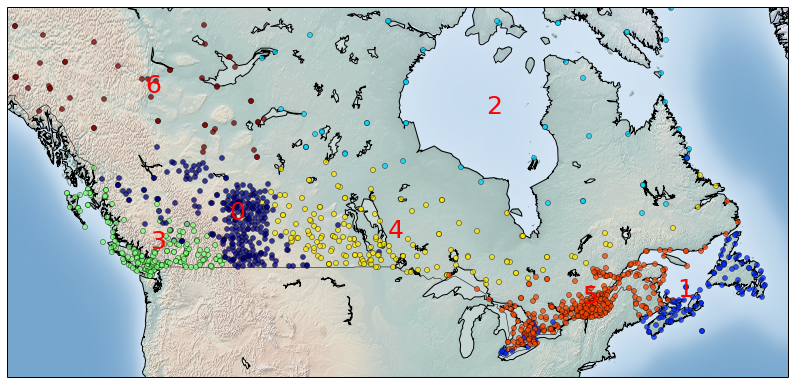

In [8]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

#Visualization1
for index,row in pdf.iterrows():
    my_map.plot(row.xm, row.ym,markerfacecolor =colors[np.float(row.Clus_km)],  marker='o', markersize= 5, alpha = 0.75)

for i in range(clusterNum): 
    cluster = pdf[["Stn_Name","Tm","xm","ym","Clus_km"]][pdf.Clus_km==i]
    cenx=np.mean(cluster.xm) 
    ceny=np.mean(cluster.ym) 
    plt.text(cenx,ceny,str(i), fontsize=25, color='red',)
    print "Cluster "+str(i)+', Avg Temp: '+ str(np.mean(cluster.Tm))